<a href="https://colab.research.google.com/github/RoshanKumar854/ML-Projects/blob/main/Coursera_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import cifar100

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

169017344/169001437 [==============================] - 6s 0us/step


In [5]:
print(test_images.shape)
print(test_labels.shape)

(10000, 32, 32, 3)
(10000, 1)


[41]


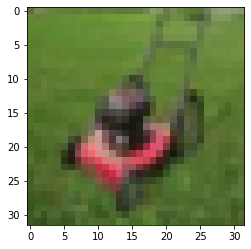

In [6]:
plt.imshow(train_images[500])
print(train_labels[500])

In [7]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='coarse')

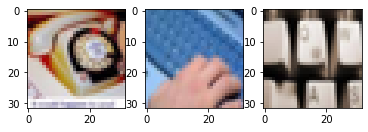

In [8]:
examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1, 3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [9]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


In [10]:
print(train_data[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [11]:
print(train_labels[0])

1


In [12]:
sequence_lengths = [len(seq) for seq in train_data]

In [13]:
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


In [14]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(skip_top=50, oov_char=2)

In [15]:
sequence_lengths = [len(seq) for seq in train_data]
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


In [16]:
def remove_oov_char(element):
  '''Filter function for removing the oov_char.'''
  return [word for word in element if word!=2]

def filter_list(lst):
  '''Run remove_oov_char on elements in a list.'''
  return [remove_oov_char(element) for element in lst]

In [17]:
train_data = filter_list(train_data)

In [18]:
sequence_lengths = [len(seq) for seq in train_data]
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

1648
3


#Data generator

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
headers = ['Season','Age','Diseases','Trauma','Surgery','Fever','Alcohol','Smoking','Sitting','Output']
fertility = pd.read_csv('/content/fertility_Diagnosis.txt', delimiter=',', header=None, names=headers)

FileNotFoundError: ignored

In [ ]:
print(fertility.shape)

In [ ]:
fertility.head()

In [ ]:
fertility['Output'] = fertility['Output'].map(lambda X: 0.0 if X=='N' else 1.0)

In [ ]:
fertility.head()

In [ ]:
fertility = fertility.astype('float32')

In [ ]:
fertility = fertility.sample(frac=1).reset_index(drop=True)

In [ ]:
fertility.head()

In [ ]:
fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [ ]:
fertility.head()

In [ ]:
fertility.columns = [col for col in fertility.columns if col != 'Output']+['output']

In [ ]:
fertility.head()

In [ ]:
fertility = fertility.to_numpy()
fertility

In [ ]:
training = fertility[0:70]
validation = fertility[70:100]

In [ ]:
training.shape

In [ ]:
training_features = training[:, 0:-1]
training_labels = training[:,-1]
validation_features = validation[:, 0 :-1]
validation_labels = validation[:, -1]

In [ ]:
print(training_labels)

In [ ]:
def get_generator(features, labels, batch_size=1):
  for n in range(int(len(features)/batch_size)):
    yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [ ]:
train_generator = get_generator(training_features, training_labels, batch_size=10)

In [ ]:
next(train_generator)

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

model_input =Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

In [ ]:
model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.2)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 5
train_steps = len(training)//batch_size

In [ ]:
epochs=3

In [ ]:
for epochs in range(epochs):
  train_generator = get_generator(training_features, training_labels, batch_size=batch_size)
  validation_generator = get_generator(validation_features, validation_labels, batch_size=30)
  model.fit_generator(train_generator, steps_per_epoch=train_steps, validation_data=validation_generator, validation_steps=1)

In [ ]:
def get_generator_cyclic(features, labels, batch_size=1):
  while True:
     for n in range(int(len(features)/batch_size)):
       yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
     permuted = np.random.permutation(len(features))
     features = features[permuted]

In [ ]:
train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [ ]:
for i in range(2*train_steps):
  next(train_generator_cyclic)

In [ ]:
validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [ ]:
model.fit_generator(train_generator_cyclic, steps_per_epoch=train_steps,
                    validation_data=validation_generator_cyclic, validation_steps=1, epochs=3)

In [ ]:
validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [ ]:
predictions = model.predict_generator(validation_generator, steps=1)
print(np.round(predictions.T[0]))

In [ ]:
print(validation_labels)

In [ ]:
validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [ ]:
print(model.evaluate(validation_generator))

#keras image data augmentation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

In [ ]:
num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
def get_generator(features, labels, batch_size=1):
  for n in range(int(len(features)/batch_size)):
    yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [ ]:
training_generator = get_generator(training_features, training_labels)

In [ ]:
image, label = next(training_generator)
print(image.shape)
print(label.shape)

In [ ]:
from matplotlib.pyplot import imshow
image, label = next(training_generator)
image_unbatched = image[0, :, :, :]
imshow(image_unbatched)
print(label)

In [ ]:
train_generator = get_generator(training_features, training_labels)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def monochrome(X):
  def func_bw(a):
    average_colour = np.mean(a)
    return [average_colour, average_colour, average_colour]

  X = np.apply_along_axis(func_bw, -1, X)
  return X

In [ ]:
image_generator = ImageDataGenerator(
    preprocessing_function=monochrome,
    rotation_range=180,
    rescale = (1/255.0)
)
image_generator.fit(training_features)

In [ ]:
image_generator_iterable = image_generator.flow(training_features, training_labels, batch_size=1, shuffle=False)


In [ ]:
image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

#The Dataset Class

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
X = np.zeros((100,10,2,2))
print(X)

In [ ]:
dataset1 = tf.data.Dataset.from_tensor_slices(X)

In [ ]:
print(dataset1)
print(dataset1.element_spec)

In [ ]:
x2 = [np.zeros((10,2,3)), np.zeros((5,2,2))]

In [ ]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [ ]:
dataset2 = tf.data.Dataset.from_tensor_slices(x2)
print(dataset2.element_spec)

In [ ]:
dataset_zipped = tf.data.Dataset.zip((dataset1, dataset2))

In [ ]:
print(dataset_zipped.element_spec)

In [ ]:
def get_batches(dataset):
  iter_dataset = iter(dataset)
  i = 0
  try:
    while next(iter_dataset):
      i = i+1
  except:
    return i    

In [ ]:
get_batches(dataset_zipped)

In [ ]:
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

In [ ]:
mnist_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

In [ ]:
print(mnist_dataset.element_spec)

In [ ]:
element = next(iter(mnist_dataset.take(1)))
print(len(element))

In [ ]:
print(element[0].shape)
print(element[1].shape)

In [ ]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

print(path_to_file)

In [ ]:
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

In [ ]:
shakespeare_dataset = tf.data.TextLineDataset(text)
print(shakespeare_dataset)

In [ ]:
shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))